In [1]:
import sys

# adapt paths
sys.path.append("/home/cctrotte/krauthammer/stcs_code/pysurvival_mine/")

In [2]:
#### 1 - Importing packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pysurvival_mine.models.simulations import SimulationModel
from pysurvival_mine.utils.metrics import concordance_index
from pysurvival_mine.utils.display import integrated_brier_score

#%matplotlib inline  # To use with Jupyter notebooks


#### 2 - Generating the dataset from a Weibull parametric model
# Initializing the simulation model
sim = SimulationModel(
    survival_distribution="Weibull",
    risk_type="linear",
    censored_parameter=10.0,
    alpha=0.01,
    beta=3.0,
)

# Generating N random samples
N = 1000
dataset = sim.generate_data(num_samples=N, num_features=3)

# Showing a few data-points
time_column = "time"
event_column = "event"
dataset.head(2)

Number of data-points: 1000 - Number of events: 819.0


,x_1,x_2,x_3,time,event
0,2.257563,9.0,-2.416804,10.612539,1.0
1,-0.028131,11.0,0.003936,2.773948,0.0


In [3]:
#### 3 - Creating the modeling dataset
# Defining the features
features = sim.features

# Building training and testing sets #
index_train, index_test = train_test_split(range(N), test_size=0.2)
data_train = dataset.loc[index_train].reset_index(drop=True)
data_test = dataset.loc[index_test].reset_index(drop=True)

# Creating the X, T and E input
X_train, X_test = data_train[features], data_test[features]
T_train, T_test = data_train["time"].values, data_test["time"].values
E_train, E_test = data_train["event"].values, data_test["event"].values
X_valid, T_valid, E_valid = X_test, T_test, E_test

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
from vdS_models.class_SurvivalQuilts import SurvivalQuilts
from vdS_models.utils_eval import calc_metrics

In [6]:
pd.Series(T_train)

0       5.652275
1       4.057205
2      11.354755
3       4.795294
4       3.614851
         ...    
795     3.472672
796     0.812632
797     2.645431
798     6.351939
799     3.094643
Length: 800, dtype: float64

In [7]:
pd.DataFrame(E_train)

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
795,1.0
796,1.0
797,1.0
798,0.0


(array([154., 272., 194.,  97.,  41.,  24.,  11.,   3.,   3.,   1.]),
 array([ 0.        ,  1.91476769,  3.82953537,  5.74430306,  7.65907075,
         9.57383843, 11.48860612, 13.40337381, 15.31814149, 17.23290918,
        19.14767687]),
 <BarContainer object of 10 artists>)

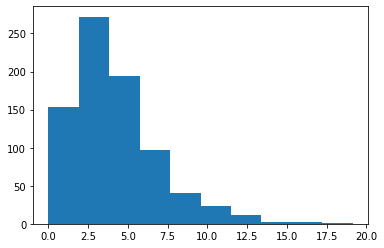

In [8]:
plt.hist(T_train)

In [9]:
T_train + 0.01

array([5.66227497e+00, 4.06720468e+00, 1.13647546e+01, 4.80529352e+00,
       3.62485141e+00, 3.57676552e+00, 5.94108310e+00, 1.45769713e+00,
       2.17229899e+00, 4.72597216e+00, 6.23953718e-01, 7.38105481e-01,
       9.07550362e+00, 3.93412922e+00, 3.21482581e+00, 5.77002151e+00,
       5.12538282e+00, 1.00000000e-02, 4.23401734e+00, 2.17785929e+00,
       1.00000000e-02, 1.16439851e+01, 2.30438703e+00, 1.30301830e+00,
       3.00425667e+00, 1.00000000e-02, 2.83369834e+00, 1.14541748e+00,
       2.18268531e+00, 6.72105389e+00, 8.27274540e+00, 1.40276348e+00,
       1.50339553e+00, 3.86932735e+00, 2.32405420e+00, 2.53817279e+00,
       4.51810358e+00, 4.95418029e+00, 3.34974322e+00, 9.70692008e+00,
       2.27976691e+00, 1.90758446e+00, 2.78394795e+00, 2.09550434e+00,
       5.53326501e+00, 6.36594654e+00, 1.00000000e-02, 1.15495357e+01,
       2.30090198e+00, 5.66324427e+00, 1.12074237e+00, 3.92088791e+00,
       2.80888772e+00, 1.78028830e+00, 2.36072317e+00, 1.12534407e+01,
      

In [66]:
pd.DataFrame(T_train + 0.01)

,0
0,5.662275
1,4.067205
2,11.364755
3,4.805294
4,3.624851
...,...
795,3.482672
796,0.822632
797,2.655431
798,6.361939


In [67]:
pd.DataFrame(E_train)

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
795,1.0
796,1.0
797,1.0
798,0.0


In [68]:
pd.DataFrame(X_train)

,0,1,2
0,-0.163632,-0.866250,1.382095
1,0.310434,-0.866250,1.228935
2,-1.335140,-1.754142,0.470261
3,-0.173114,-0.422304,-0.626313
4,0.150632,1.353480,-0.675734
...,...,...,...
795,-0.126932,-0.866250,0.766432
796,1.577789,1.353480,1.120057
797,2.673301,2.241373,-2.443741
798,-0.019650,-1.310196,0.037390


In [10]:
model_sq = SurvivalQuilts()
model_sq.train(
    pd.DataFrame(X_train), pd.DataFrame(T_train + 0.01), pd.DataFrame(E_train)
)

initial training of underlying models...
CV.. 1/10
CV.. 2/10
CV.. 3/10
CV.. 4/10
CV.. 5/10
CV.. 6/10
CV.. 7/10
CV.. 8/10
CV.. 9/10
CV.. 10/10
TIME K = 0
[[0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]
 [0.         0.         0.         0.99999999 0.         0.        ]]
[[0.         0.         0.         0.99999999 0.         0.        ]]
[[-0.35716596]]
=========== BO Finished ===========
out_itr: 0 | BEST X: [[0.         

In [51]:
pd.DataFrame(pd.DataFrame(X_test).iloc[1, :]).T

,0,1,2
1,0.527739,0.021642,-0.062646


In [50]:
pd.DataFrame(X_test)

,0,1,2
0,1.081383,-1.310196,0.338375
1,0.527739,0.021642,-0.062646
2,0.856554,-0.422304,-1.330380
3,-1.364848,0.465588,-0.831392
4,-0.404103,1.797427,-0.128662
...,...,...,...
195,-0.020110,-1.310196,-1.658395
196,-0.831547,0.465588,0.418705
197,-0.436710,0.021642,0.772938
198,-2.251897,0.909534,-0.234559


In [60]:
preds = []
for i in range(len(X_test)):
    x = pd.DataFrame(pd.DataFrame(X_test).iloc[i, :]).T
    t = T_test[i] + 0.01
    preds.append(model_sq.predict(x, [t]).flatten().item())

In [61]:
preds

[0.25746457256907407,
 0.0025070317619623923,
 0.15577251271288933,
 0.21536146113967475,
 0.014967290295671492,
 0.01222261858543343,
 0.00421476329354907,
 0.17652987039497947,
 3.371283241053935e-08,
 0.2439664274260288,
 0.06372468615739031,
 0.2520057873436321,
 0.17108409947162811,
 0.0007971072242843841,
 0.00020483255206408524,
 0.0016386212593959692,
 0.19965520693742533,
 0.11897153065472602,
 0.21895903128408523,
 0.0,
 0.09853615263410015,
 0.0,
 0.06707219855364838,
 0.009148935083372133,
 3.6329324333033755e-05,
 0.5696750685461527,
 0.007103266233924173,
 0.007020783950702159,
 0.2605017809460678,
 0.241062168672381,
 0.004043848050027061,
 0.2633125911865742,
 0.042609400491088016,
 0.001819196561492247,
 0.0,
 0.2369450763749824,
 0.13098588553968085,
 0.2443507819577087,
 0.30389502769646665,
 8.884861148353059e-05,
 0.004291959853416419,
 0.0035738874900831203,
 0.13438141113007837,
 0.008403504933954762,
 3.376258139908128e-05,
 0.28381826556803896,
 0.2549813452608

In [26]:
from sksurv.metrics import concordance_index_censored

In [65]:
concordance_index_censored(E_test.astype(bool), T_test + 0.01, preds)

(0.3672166686739733, 6088, 10498, 20, 0)

In [64]:
E_test.astype(bool)

array([ True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,

In [30]:
T_test.shape

(200,)

In [35]:
pred[0, :]

array([0.25746457, 0.00094272, 0.25746457, 0.32336187, 0.00094272,
       0.00094272, 0.00094272, 0.33303888, 0.00094272, 0.25746457,
       0.00094272, 0.32336187, 0.00094272, 0.00094272, 0.00094272,
       0.00094272, 0.33303888, 0.00094272, 0.32336187, 0.        ,
       0.3347794 , 0.        , 0.00094272, 0.25746457, 0.00094272,
       0.00094272, 0.00094272, 0.00094272, 0.25746457, 0.25746457,
       0.00094272, 0.25746457, 0.00094272, 0.00094272, 0.        ,
       0.00094272, 0.25746457, 0.32336187, 0.00094272, 0.00094272,
       0.00094272, 0.00094272, 0.32336187, 0.00094272, 0.00094272,
       0.32336187, 0.32336187, 0.00094272, 0.25746457, 0.25746457,
       0.25746457, 0.00094272, 0.25746457, 0.00094272, 0.25746457,
       0.32336187, 0.00094272, 0.25746457, 0.25746457, 0.00094272,
       0.32336187, 0.25746457, 0.25746457, 0.00094272, 0.00094272,
       0.00094272, 0.00094272, 0.00094272, 0.00094272, 0.25746457,
       0.00094272, 0.25746457, 0.        , 0.00094272, 0.00094